**Import all necesssary libray**

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


**Load the data**

In [209]:
car_price = pd.read_csv('Cardetails.csv')
car_price.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Check the detailes of dataset**

In [210]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Deatile of all coulmns in Data Frame ** **bold text**

In [211]:
car_price.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


**Get the duplicate value**

In [212]:
car_price.duplicated().sum()

1202

**Get The Null value from data set**

In [213]:
car_price.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


**Total Number of Rows and coulmn**

In [214]:
car_price.shape

(8128, 13)

**Fill the missing values for numerical terms and adjust the value**


In [215]:
car_price['km_driven']=car_price['km_driven'].fillna(car_price['km_driven'].mean())

car_price['year']=car_price['year'].fillna(car_price['year'].mean())


In [216]:
car_price=car_price[~car_price['fuel'].isna()]


In [217]:
car_price=car_price[~car_price['name'].isna()]
car_price=car_price[~car_price['seller_type'].isna()]
car_price=car_price[~car_price['mileage'].isna()]
car_price=car_price[~car_price['engine'].isna()]
car_price=car_price[~car_price['max_power'].isna()]
car_price=car_price[~car_price['transmission'].isna()]
car_price=car_price[~car_price['torque'].isna()]

In [218]:
car_price.shape

(7906, 13)

In [219]:
car_price

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Index reset and replca the value in 0, 1 format**

In [220]:
car_price=car_price.reset_index(drop=True)

In [221]:
car_price

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Get Unique value in data frame coulmn**

In [222]:
car_price['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

**To check the Datatypes in the dataset**

In [223]:
print(car_price.dtypes)


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


**Change the coulmn data type using using labelEncder**

In [224]:
if 'owner' in car_price.columns:
    le = LabelEncoder()
    car_price['owner'] = le.fit_transform(car_price['owner'])

**Get the dummy dataframe from the same data**

In [225]:
df = pd.get_dummies(car_price, columns=['name','fuel', 'seats', 'seller_type', 'transmission', 'mileage', 'engine','max_power', 'torque'], drop_first=True)


**Create numeric data frame to perform correlation**

In [226]:
numeric_df = df.select_dtypes(include=['number'])

**To view the numeric data frame**

In [227]:
print(numeric_df.head())

   year  selling_price  km_driven  owner
0  2014         450000     145500      0
1  2014         370000     120000      2
2  2006         158000     140000      4
3  2010         225000     127000      0
4  2007         130000     120000      0


**to check head of the data**

In [228]:
df.head()

,year,selling_price,km_driven,owner,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,name_Ashok Leyland Stile LE,name_Audi A3 35 TDI Premium Plus,name_Audi A3 40 TFSI Premium,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,450000,145500,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,158000,140000,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**correlation matrix, show the correaltion between targetand predict variable**

In [229]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                   year  selling_price  km_driven     owner
year           1.000000       0.412302  -0.428548 -0.472522
selling_price  0.412302       1.000000  -0.222158 -0.224413
km_driven     -0.428548      -0.222158   1.000000  0.281945
owner         -0.472522      -0.224413   0.281945  1.000000


**Heatmap correlation graph between predict variable with others**

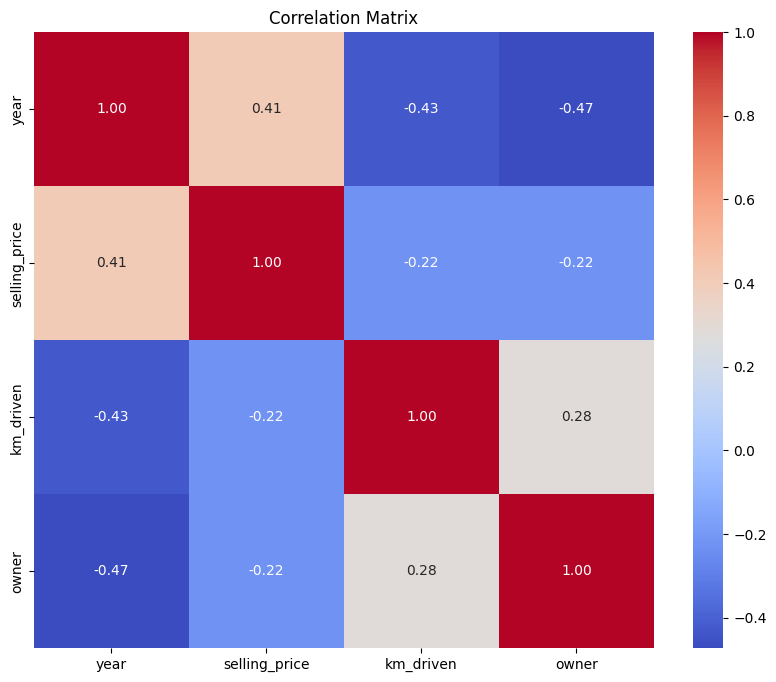

In [230]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Corraltion between Selling_price -0.01 and km_driven -0.22 which is nearest to -1 value is negtive corelation**
**Selling price with the year is positive corelation and the dignol line respresnt itself coralation with the coulmn**


**To visulaize the distribution of data**

<ipython-input-231-379f5e87bbf4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_price['selling_price'])


Text(0.5, 1.0, 'car price prediction')

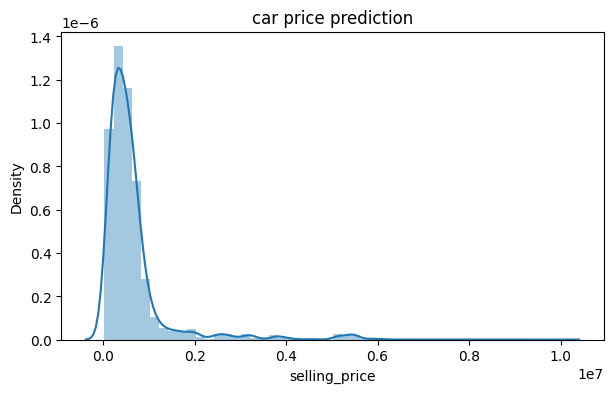

In [231]:
plt.figure(figsize=(7,4))
sns.distplot(car_price['selling_price'])
plt.title('car price prediction')

**Checking relationship of Year with Price**

**The relationship between price and year is show that price is increse yearly wise but most saling car year is 2014 to 2019.**


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be plac

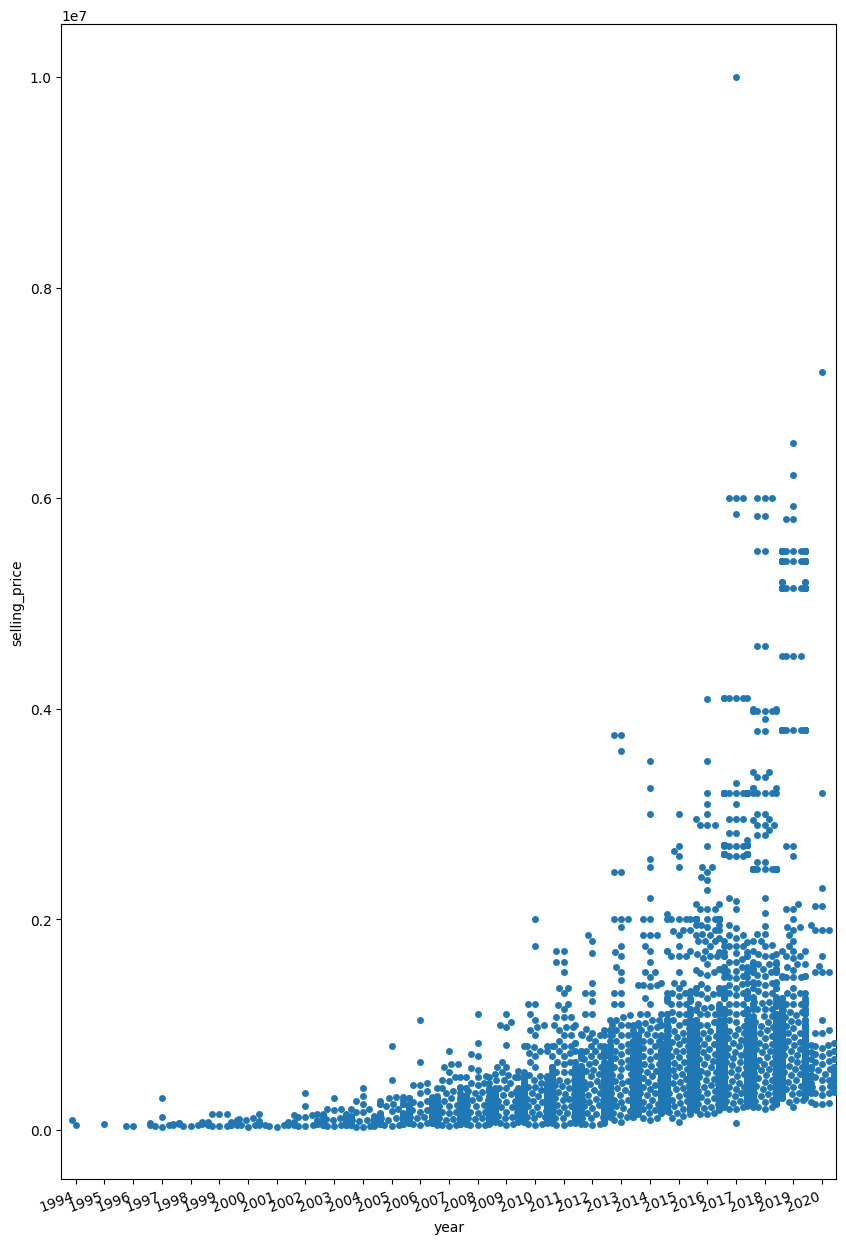

In [232]:
plt.subplots(figsize=(10,15))
ax=sns.swarmplot(x='year',y='selling_price',data=car_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
plt.show()

**Checking relationship of kms_driven with Price**

 Each point on the plot represents a car in your dataset, which if the km driven increses the price of car decreses.its negtive correlation.

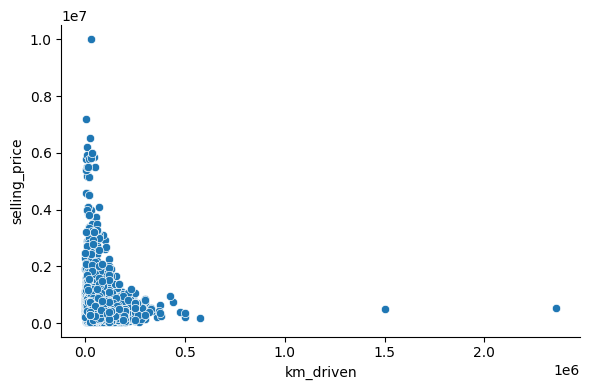

In [233]:
sns.relplot(x='km_driven',y='selling_price',data=car_price,height=4,aspect=1.5)
plt.tight_layout()

**Checking relationship of Fuel Type with Price**

This graph distribute numeric variable with catgorical variable, how the car price fell down with change the fuel. the box represent the IQR and the line outside the box is represent range of data and out liear



<Axes: xlabel='fuel', ylabel='selling_price'>

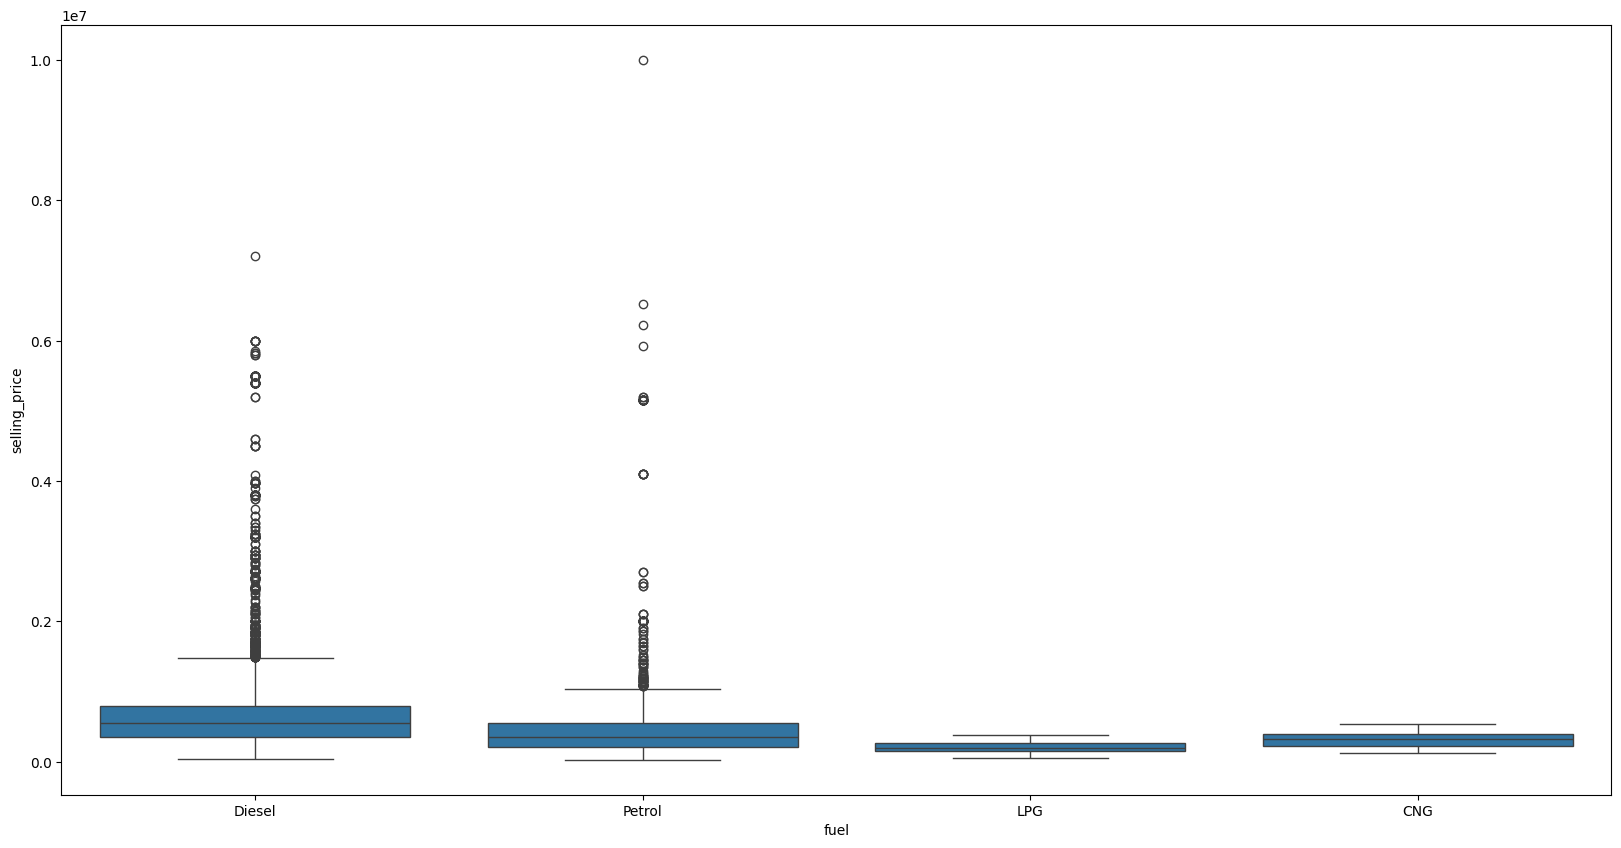

In [234]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='fuel',y='selling_price',data=car_price)

**Extarct Data from the data frame to predict seeling price**

In [235]:
X=car_price[['name', 'year','km_driven','fuel',	'seller_type','transmission',	'owner','mileage',	'engine',	'max_power',	'torque',	'seats']]
Y=car_price['selling_price']

**Check the X variable data**

In [236]:
X.shape

(7906, 12)

**Y variable data**

In [237]:
Y.shape

(7906,)

**Convert the data type of each coulmn into string and int**

In [238]:
car_price['name']=car_price['name'].astype(str)
car_price['year']=car_price['year'].astype(int)
car_price['km_driven']=car_price['km_driven'].astype(int)
car_price['fuel']=car_price['fuel'].astype(str)
car_price['seller_type']=car_price['seller_type'].astype(str)
car_price['transmission']=car_price['transmission'].astype(str)
car_price['mileage']=car_price['mileage'].astype(str)
car_price['engine']=car_price['engine'].astype(str)
car_price['max_power']=car_price['max_power'].astype(str)

**Information of data**

In [239]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 803.1+ KB


**encoding the catagorical coulmn into numbers**

In [240]:
car_price['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [241]:
car_price['fuel']=car_price['fuel'].map({'Diesel':0,'Petrol':1, 'LPG':2,'CNG':3})
car_price['fuel'].unique()

array([0, 1, 2, 3])

In [242]:
car_price['seller_type']=car_price['seller_type'].map({'Individual':0,'Dealer':1, 'Trustmark Dealer':2})
car_price['seller_type'].unique()

array([0, 1, 2])

In [243]:
car_price['transmission']=car_price['transmission'].map({'Manual':0,'Automatic':1})
car_price['transmission'].unique()

array([0, 1])

In [244]:
car_price['transmission'].unique()

array([0, 1])

In [245]:
car_price['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [246]:
name_counts = car_price['name'].nunique()
print(name_counts)

1982


In [247]:
car_price['mileage'] = car_price['mileage'].str.replace('kmpl','').str.strip()
car_price['mileage'] = car_price['mileage'].str.replace('km/kg','').str.strip()

In [248]:
car_price['engine'] = car_price['engine'].str.replace('CC','').str.strip()

In [249]:
car_price['max_power'] = car_price['max_power'].str.replace('bhp','').str.strip()

In [250]:
car_price = car_price.drop('torque', axis=1)

In [251]:
car_price.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,2,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,4,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.1,1298,88.2,5.0


**Complete Description of our data set Standard daviation, Min, Max and qurtile**

In [252]:
car_price.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,0.473817,0.199722,0.131672,0.790159,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.545591,0.468575,0.338155,1.205767,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,0.000000,0.000000,0.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1.000000,0.000000,0.000000,2.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,14.000000


**Import the library to implement models**

In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

**Separate features and target variable our target variable is Selling Price**


In [254]:
X = car_price.drop('selling_price', axis=1)
y = car_price['selling_price']

**Split the data into training and testing sets**


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define preprocessing for numerical and categorical features**


In [256]:
numeric_features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']
categorical_features = ['name']

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

**First transforms data and then fits a model Random forest regressor**


In [257]:
RF_model_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    #('preprocessor', preprocessor),
    ('model', RandomForestRegressor())])

# Fit the pipeline on training data
RF=RF_model_pipeline.fit(X_train, y_train)


**Evaluate the Result on testing data**


In [258]:
score =RF_model_pipeline.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

Model Score: 0.96


**Implement Logistic Regression Model with result of 0.22**

---



In [259]:
# Create a pipeline that first transforms data and then fits a model
logr_model_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    #('preprocessor', preprocessor),
    ('model', LogisticRegression())])

# Fit the pipeline on training data
logr= logr_model_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluate the Result on testing data**


In [260]:
score = logr_model_pipeline.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

Model Score: 0.22


**Implement GradientBoosting Regresser with score .91**

In [261]:
# Create a pipeline that first transforms data and then fits a model
gbr_model_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    #('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())])

# Fit the pipeline on training data
gbr= gbr_model_pipeline.fit(X_train, y_train)


**Evaluate the Result on testing data**

In [262]:
score = gbr_model_pipeline.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

Model Score: 0.91


**Implement XGB Regresser with score .97**

In [263]:
# Create a pipeline that first transforms data and then fits a model
xgb_model_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    #('preprocessor', preprocessor),
    ('model', XGBRegressor())])

# Fit the pipeline on training data
xgb= xgb_model_pipeline.fit(X_train, y_train)


**Evaluate the Result on testing data**

In [264]:
score = xgb_model_pipeline.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

Model Score: 0.97


**Implement Linear Regression Model with result of 0.97**


In [265]:
# Create a pipeline that first transforms data and then fits a model
lr_model_pipeline = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    #('preprocessor', preprocessor),
    ('model', LinearRegression())])

# Fit the pipeline on training data
lr=lr_model_pipeline.fit(X_train, y_train)

**Evaluate the Result on testing data**

In [266]:
score = lr_model_pipeline.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

Model Score: 0.97


**Pickle is library to save the model and deploy on streamlit**

In [269]:
import pickle
#pickle.dump(xgb_model_pipeline,open('xgb_saved', 'wb'))

In [268]:
#model_loaded =pickle.load(open('/content/xgb_saved','rb'))